In [1]:
import pandas as pd
import csv
import numpy as mp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Resources/Jobs_2-9.csv")
data.head()

,Job Title,Job Experience Required,Location,Functional Area,Industry,Role,Longitude,Latitude,sal,Year Bucket,Year bin
0,Digital Media Planner,5 - 10 yrs,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager,72.877393,19.075990,3855,5,0-5
1,Online Bidding Executive,2 - 5 yrs,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer,73.854454,18.521428,2639,2,0-5
2,Trainee Research/ Research Executive- Hi- Tec...,0 - 1 yrs,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive,77.002700,28.428262,2156,0,0-5
3,Technical Support,0 - 5 yrs,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer,72.877393,19.075990,4059,0,0-5
4,Software Test Engineer -hyderabad,2 - 5 yrs,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer,78.474061,17.360589,5347,2,0-5


In [3]:
# bin count
years = data['Year bin']
bins_count = len(pd.unique(data['Year bin']))
print(f"There are {bins_count} total bins.")

# count per bin
zto5 = data['Year bin'].value_counts()['0-5']
print(f"{zto5} people have a minimum of 0-5 years of experience.")
sto10 = data['Year bin'].value_counts()['6-10']
print(f"{sto10} people have a minimum of 6-10 years of experience.")
eto17 = data['Year bin'].value_counts()['11-17']
print(f"{eto17} people have a minimum of 11-17 years of experience.")
sto20 = data['Year bin'].value_counts()['17-20']
print(f"{sto20} person has a minimum of 17-20 years of experience.")

There are 4 total bins.
390 people have a minimum of 0-5 years of experience.
51 people have a minimum of 6-10 years of experience.
17 people have a minimum of 11-17 years of experience.
1 person has a minimum of 17-20 years of experience.


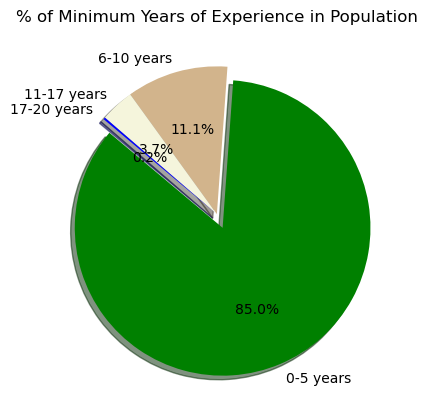

In [4]:
# pie chart
bins_label = ['0-5 years', '6-10 years', '11-17 years', '17-20 years']
count_per_bin = [390, 51, 17, 1]
colors = ['green', 'tan', 'beige', 'blue']
explode = (0.1, 0, 0, 0)
plt.pie(count_per_bin, explode=explode, labels = bins_label, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Minimum Years of Experience in Population")
plt.savefig('Pie_SK.png')

In [5]:
# df 
zto5_df = data.loc[data['Year bin'] == "0-5",:]
sto10_df = data.loc[data['Year bin'] == "6-10",:]
eto17_df = data.loc[data['Year bin'] == "11-17",:]
sto20_df = data.loc[data['Year bin'] == "17-20",:]

In [6]:
# merge
zto5_max = zto5_df.groupby('sal').max()['Year bin']
zto5_vol = pd.DataFrame(zto5_max)
zto5_merge = pd.merge(zto5_vol, data, on = ('sal', 'Year bin'), how = 'left')
zto5_years = zto5_merge['sal']

# statistics
quartiles = zto5_years.quantile([.25, .5, .75])
lowerq = quartiles[.25]
upperq  = quartiles[.75]
iqr = upperq - lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

In [7]:
# bins
bins_list = ['0-5', '6-10', '11-17', '17-20']
bins = data[data['Year bin'].isin(bins_list)]
bins.head()

,Job Title,Job Experience Required,Location,Functional Area,Industry,Role,Longitude,Latitude,sal,Year Bucket,Year bin
0,Digital Media Planner,5 - 10 yrs,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager,72.877393,19.075990,3855,5,0-5
1,Online Bidding Executive,2 - 5 yrs,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer,73.854454,18.521428,2639,2,0-5
2,Trainee Research/ Research Executive- Hi- Tec...,0 - 1 yrs,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive,77.002700,28.428262,2156,0,0-5
3,Technical Support,0 - 5 yrs,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer,72.877393,19.075990,4059,0,0-5
4,Software Test Engineer -hyderabad,2 - 5 yrs,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer,78.474061,17.360589,5347,2,0-5


In [8]:
#Loops
#for i in bins_list:
    #quartiles = zto5_years.quantile([.25, .5, .75]).round(2)
    #lowerq = quartiles[.25].round(2)
    #upperq  = quartiles[.75].round(2)
    #iqr = round(upperq - lowerq, 2)
    #lower_bound = round(lowerq - (1.5*iqr),2)
    #upper_bound = round(upperq + (1.5*iqr),2)
#if treatment == 0:
    #treatment+=1

In [9]:
# box plot - not in order

#boxplt = bins.boxplot(by='Year bin',column=['sal'],
    #grid=False,rot=90,figsize=(20,8))
#boxplt.set_ylabel('Salary')
#boxplt.set_xlabel('Years of Experience')
#plt.title('Salary Based on Years of Experience')
#plt.suptitle('')
#plt.show
#plt.savefig('Box_SK.png')

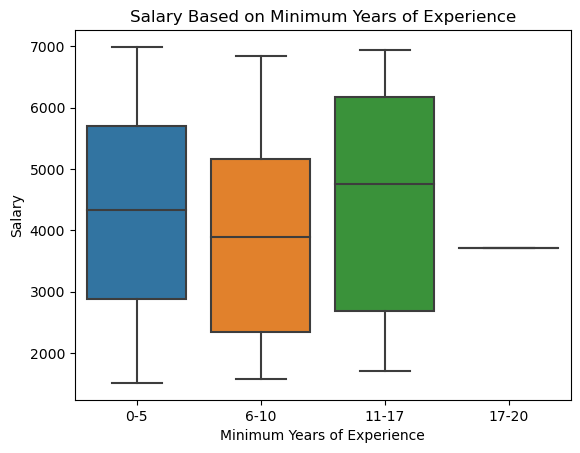

In [10]:
# box plot using sns for order
boxplt = sns.boxplot(data = data, x = 'Year bin', y = 'sal', order = bins_list)
boxplt.set_ylabel('Salary')
boxplt.set_xlabel('Minimum Years of Experience')
plt.title('Salary Based on Minimum Years of Experience')
plt.suptitle('')
plt.show
plt.savefig('Box_SK.png')

In [12]:
#mean, med, min, max, 
#exp_avg = data.groupby(by=['Year bin'])['sal'].mean().reindex(labels= bins_list)
#data = pd.DataFrame(data, columns = [bins_list])
exp_avg = data.groupby('Year bin').mean()['sal']
exp_med = data.groupby('Year bin').median()['sal']
exp_min = data.groupby('Year bin').min()['sal'] 
exp_max = data.groupby('Year bin').max()['sal']
print(exp_avg)
print(exp_med)
print(exp_min)
print(exp_max)

Year bin
0-5      4268.638462
11-17    4587.588235
17-20    3707.000000
6-10     3787.666667
Name: sal, dtype: float64
Year bin
0-5      4330.0
11-17    4754.0
17-20    3707.0
6-10     3883.0
Name: sal, dtype: float64
Year bin
0-5      1510
11-17    1704
17-20    3707
6-10     1571
Name: sal, dtype: int64
Year bin
0-5      6991
11-17    6944
17-20    3707
6-10     6851
Name: sal, dtype: int64
